# CNN

## Utilisation de Jupyter Notebook

Le principe est simple : 
 - Chaque notebook est constitué d’une liste de **cellules**
 - Chacune peut contenir du **texte formaté** ou du **code** (Python, dans notre cas)
 - On **exécute** une cellule de code -> le résultat s’affiche sous la cellule

Cliquez sur le menu **Help** > **User Interface Tour** pour un tour rapide de l’interface.    

Pour vous entraîner :
- **Insérez** quelques cellules de code au début du notebook
- Exécutez quelques commandes Python, telles que **print("Hello world!")** :
    - Cliquez dans une cellule de code et saisissez le code à exécuter
    - Exécutez le code de la cellule en tapant Shift-Entrée ou en cliquant sur le bouton d’exécution
    
Lorsque vous **cliquez** à l’intérieur d’une cellule, vous passez en mode **édition** (la cellule est alors encadrée en *vert*). Lorsque vous tapez la **touche Echap** (Esc) ou que vous cliquez juste à gauche de la cellule, vous passez en mode **commande** (la cellule est alors encadrée en *bleu*). 

Lorsque vous êtes en **mode commande**, tapez la **touche H** pour afficher les nombreux **raccourcis clavier** disponibles

## Préparation

Tout d'abord, assurons-nous que ce bloc-notes fonctionne bien en python 3, importons quelques modules communs, assurons-nous que MatplotLib trace des figures :

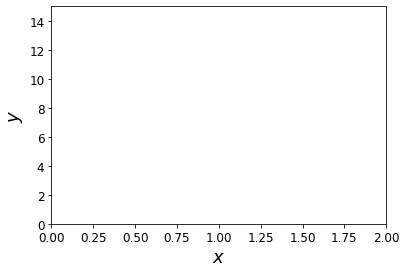

In [126]:
# Pour soutenir à la fois python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Importations communes
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Quelques fonctions pour afficher des images à niveaux de gris ou en couleur :

In [127]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

Pour utiliser TensorFlow :

In [128]:
import tensorflow as tf

Pour utiliser d'autres utilitaires :

In [129]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# La couche de convolution

Le code ci-dessous permet d'appliquer un **filtre de convolution** *vertical* et *horizontal* sur une image exemple :

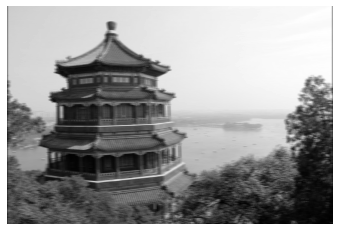

In [130]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

L'image originale peut être affichée comme ci-dessous :

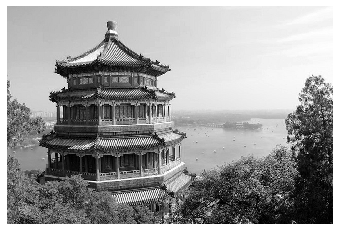

In [131]:
plot_image(images[0, :, :, 0])
plt.show()

In [132]:
def crop(images):
    return images[150:220, 130:250]

Affichage de l'image rognée

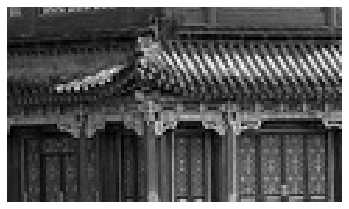

In [133]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

L'application des filtres horizontal et vertical donne ceci :

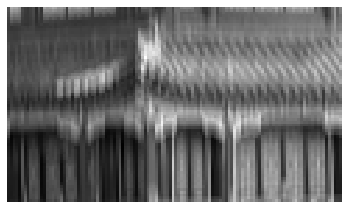

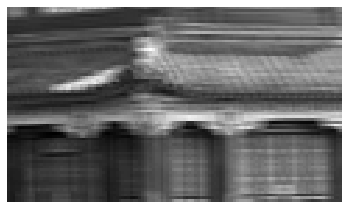

In [134]:
for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

**Question 1.1 :** Afficher dessous votre propre image et le résultat du filtre horizontal. 

In [135]:
# Reponse
from PIL import Image

#img = np.array(Image.open('dog.jpg'))
#height, width, channels = img.shape
#image_grayscale = img.mean(axis=2).astype(np.float32)
#images = image_grayscale.reshape(1, height, width, 1)
    

**Question 1.2 :** Quelle partie de l'image ce filtre met-il en évidence ?

réponse

Créons une couche convolutionnelle 2D, en utilisant keras.layers.Conv2D()

In [136]:
np.random.seed(42)
tf.random.set_seed(42)

from tensorflow import keras

conv = keras.layers.Conv2D(filters=2, kernel_size=7, strides=1,
                           padding="SAME", activation="relu", input_shape=outputs.shape)

Appelons ce calque, en lui passant les deux images de test :

In [137]:
conv_outputs = conv(images)
conv_outputs.shape 

TensorShape([2, 427, 640, 2])

La sortie est un tenseur 4D. Les dimensions sont : taille du lot, hauteur, largeur, canaux. La première dimension (taille du lot) est 2 puisqu'il y a 2 images en entrée. Les deux dimensions suivantes sont la hauteur et la largeur des cartes de caractéristiques de sortie : puisque padding="SAME" et strides=1, les cartes de caractéristiques de sortie ont la même hauteur et la même largeur que les images d'entrée (dans ce cas, 427×640). Enfin, cette couche convolutive a 2 filtres, donc la dernière dimension est 2 : il y a 2 cartes de caractéristiques de sortie par image d'entrée.

Comme les filtres sont initialisés de manière aléatoire, ils détecteront initialement des motifs aléatoires. Jetons un coup d'œil aux 2 cartes de caractéristiques de sortie pour chaque image :

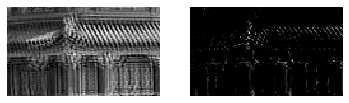

In [138]:

for feature_map_index in (0, 1):
    plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
    plot_image(crop(conv_outputs[0, :, :, feature_map_index]))
plt.show()

Bien que les filtres aient été initialisés de manière aléatoire, le second filtre se comporte comme un détecteur de bords. Les filtres initialisés de façon aléatoire agissent souvent de cette façon, ce qui est plutôt heureux puisque la détection des bords est très utile dans le traitement des images.

Si nous voulons, nous pouvons définir les filtres comme étant ceux que nous avons définis manuellement plus tôt, et définir les biais comme étant des zéros (dans la vie réelle, nous n'aurons presque jamais besoin de définir les filtres ou les biais manuellement, car la couche convolutionnelle apprendra simplement les filtres et les biais appropriés pendant l'apprentissage) :

In [139]:
conv.set_weights([filters, np.zeros(2)])

Maintenant, appelons à nouveau cette couche sur les deux mêmes images, et vérifions que les cartes de sortie mettent bien en évidence les lignes verticales et les lignes horizontales, respectivement (comme précédemment) :

In [140]:
conv_outputs = conv(images)
conv_outputs.shape 

TensorShape([2, 427, 640, 2])

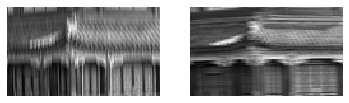

In [141]:
for feature_map_index in (0, 1):
    plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
    plot_image(crop(conv_outputs[0, :, :, feature_map_index]))
plt.show()

**Question 1.3** Faire la même chose avec une image à vous

In [142]:
# Reponse
from PIL import Image

#img = np.array(Image.open('dog.jpg'))
#height, width, channels = img.shape
#image_grayscale = img.mean(axis=2).astype(np.float32)
#images = image_grayscale.reshape(1, height, width, 1)
    

**Question 1.4** : Que représente ce résultat, qu'est-ce qui est mis en valeur ?

reponse

## VALID vs SAME padding

In [143]:
def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
    if padding == "SAME":
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1

In [144]:
def pad_before_and_padded_size(input_size, kernel_size, strides=1):
    fmap_size = feature_map_size(input_size, kernel_size, strides)
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
    pad_before = (padded_size - input_size) // 2
    return pad_before, padded_size

In [145]:
def manual_same_padding(images, kernel_size, strides=1):
    if kernel_size == 1:
        return images.astype(np.float32)
    batch_size, height, width, channels = images.shape
    top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides)
    left_pad, padded_width  = pad_before_and_padded_size(width, kernel_size, strides)
    padded_shape = [batch_size, padded_height, padded_width, channels]
    padded_images = np.zeros(padded_shape, dtype=np.float32)
    padded_images[:, top_pad:height+top_pad, left_pad:width+left_pad, :] = images
    return padded_images

L'utilisation du remplissage "``SAME``" équivaut à un remplissage manuel à l'aide de ``manual_same_padding()``, puis à l'utilisation du remplissage "``VALID``" (ce qui prête à confusion, le remplissage "``VALID``" signifie qu'il n'y a pas de remplissage du tout) :

In [146]:
kernel_size = 7
strides = 2

conv_valid = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="VALID")
conv_same = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="SAME")

valid_output = conv_valid(manual_same_padding(images, kernel_size, strides))

# Need to call build() so conv_same's weights get created
conv_same.build(tf.TensorShape(images.shape))

# Copy the weights from conv_valid to conv_same
conv_same.set_weights(conv_valid.get_weights())

same_output = conv_same(images.astype(np.float32))

assert np.allclose(valid_output.numpy(), same_output.numpy())

# Couche de pooling

Le code ci-dessous permet d'extraire une couche de **pooling** d'une image :

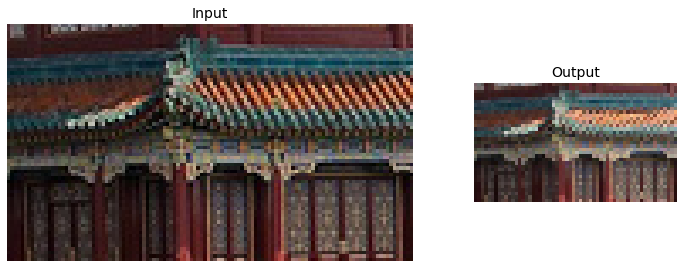

In [147]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()




**Question 2.1 :** Modifier le code ci-dessous pour faire une couche de pooling de taille 8x8.

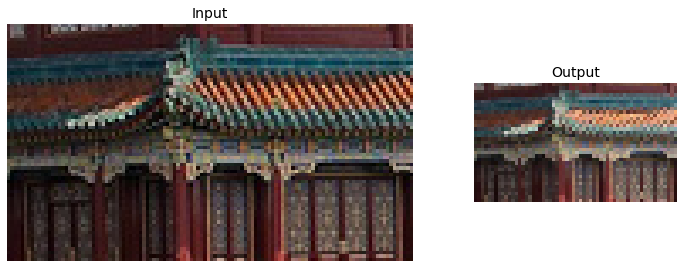

In [152]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()



**Question 2.2 :** Est-ce qu'il y a de la perte d'information ? Cela va-t-il favoriser le surajustement ?

Réponse

**Question 2.3 :** Modifier le code ci-dessous pour faire pour créer une couche de mean-pooling qui utilise la moyenne plutôt que le maximum. La documentation est [ici](https://keras.io/api/layers/)

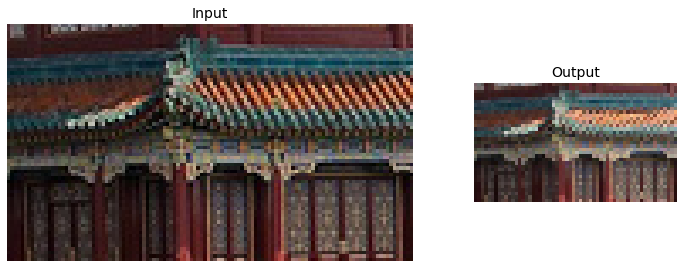

In [156]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()



**Question 2.4** Est-ce que l'image est plus clair ou plus sombre qu'avec le maximum ? Expliquer pourquoi